installing kaggle to read dataset

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')  #Mounting Gdrive for kaggle API storage

Mounted at /content/drive


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp "/content/drive/MyDrive/Colab Notebooks/Kaggle_Cred/kaggle.json" ~/.kaggle/kaggle.json

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset # Download the dataset from kaggle

100% 2.70G/2.70G [02:17<00:00, 21.1MB/s]
100% 2.70G/2.70G [02:17<00:00, 21.1MB/s]


In [8]:
!unzip -q new-plant-diseases-dataset.zip # unzipping the dataset

In [9]:
import warnings
warnings.filterwarnings("ignore")
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
# tf.compat.v1.set_random_seed(0)
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
# np.random.seed(0)
import itertools
import os as os
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [12]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
data_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
vaild_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)#disease

In [14]:
print("Total number of disease are: {}".format(len(diseases)))

Total number of disease are: 38


In [15]:
plants = []
number_of_diseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        number_of_diseases += 1

In [16]:
print(f"The unique Plants are: \n{plants}")
print("Number of diseases: {}".format(number_of_diseases))

The unique Plants are: 
['Peach', 'Cherry_(including_sour)', 'Apple', 'Tomato', 'Potato', 'Squash', 'Orange', 'Strawberry', 'Corn_(maize)', 'Pepper,_bell', 'Blueberry', 'Grape', 'Soybean', 'Raspberry']
Number of diseases: 26


In [17]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))

# convert it into pandas dataframe
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["number of images"])
img_per_class

,number of images
Peach___healthy,1728
Cherry_(including_sour)___healthy,1826
Apple___Cedar_apple_rust,1760
Tomato___Leaf_Mold,1882
Tomato___Spider_mites Two-spotted_spider_mite,1741
Potato___Late_blight,1939
Squash___Powdery_mildew,1736
Orange___Haunglongbing_(Citrus_greening),2010
Strawberry___healthy,1824
Apple___Apple_scab,2016


Text(0.5, 1.0, 'Images per each class of plant disease')

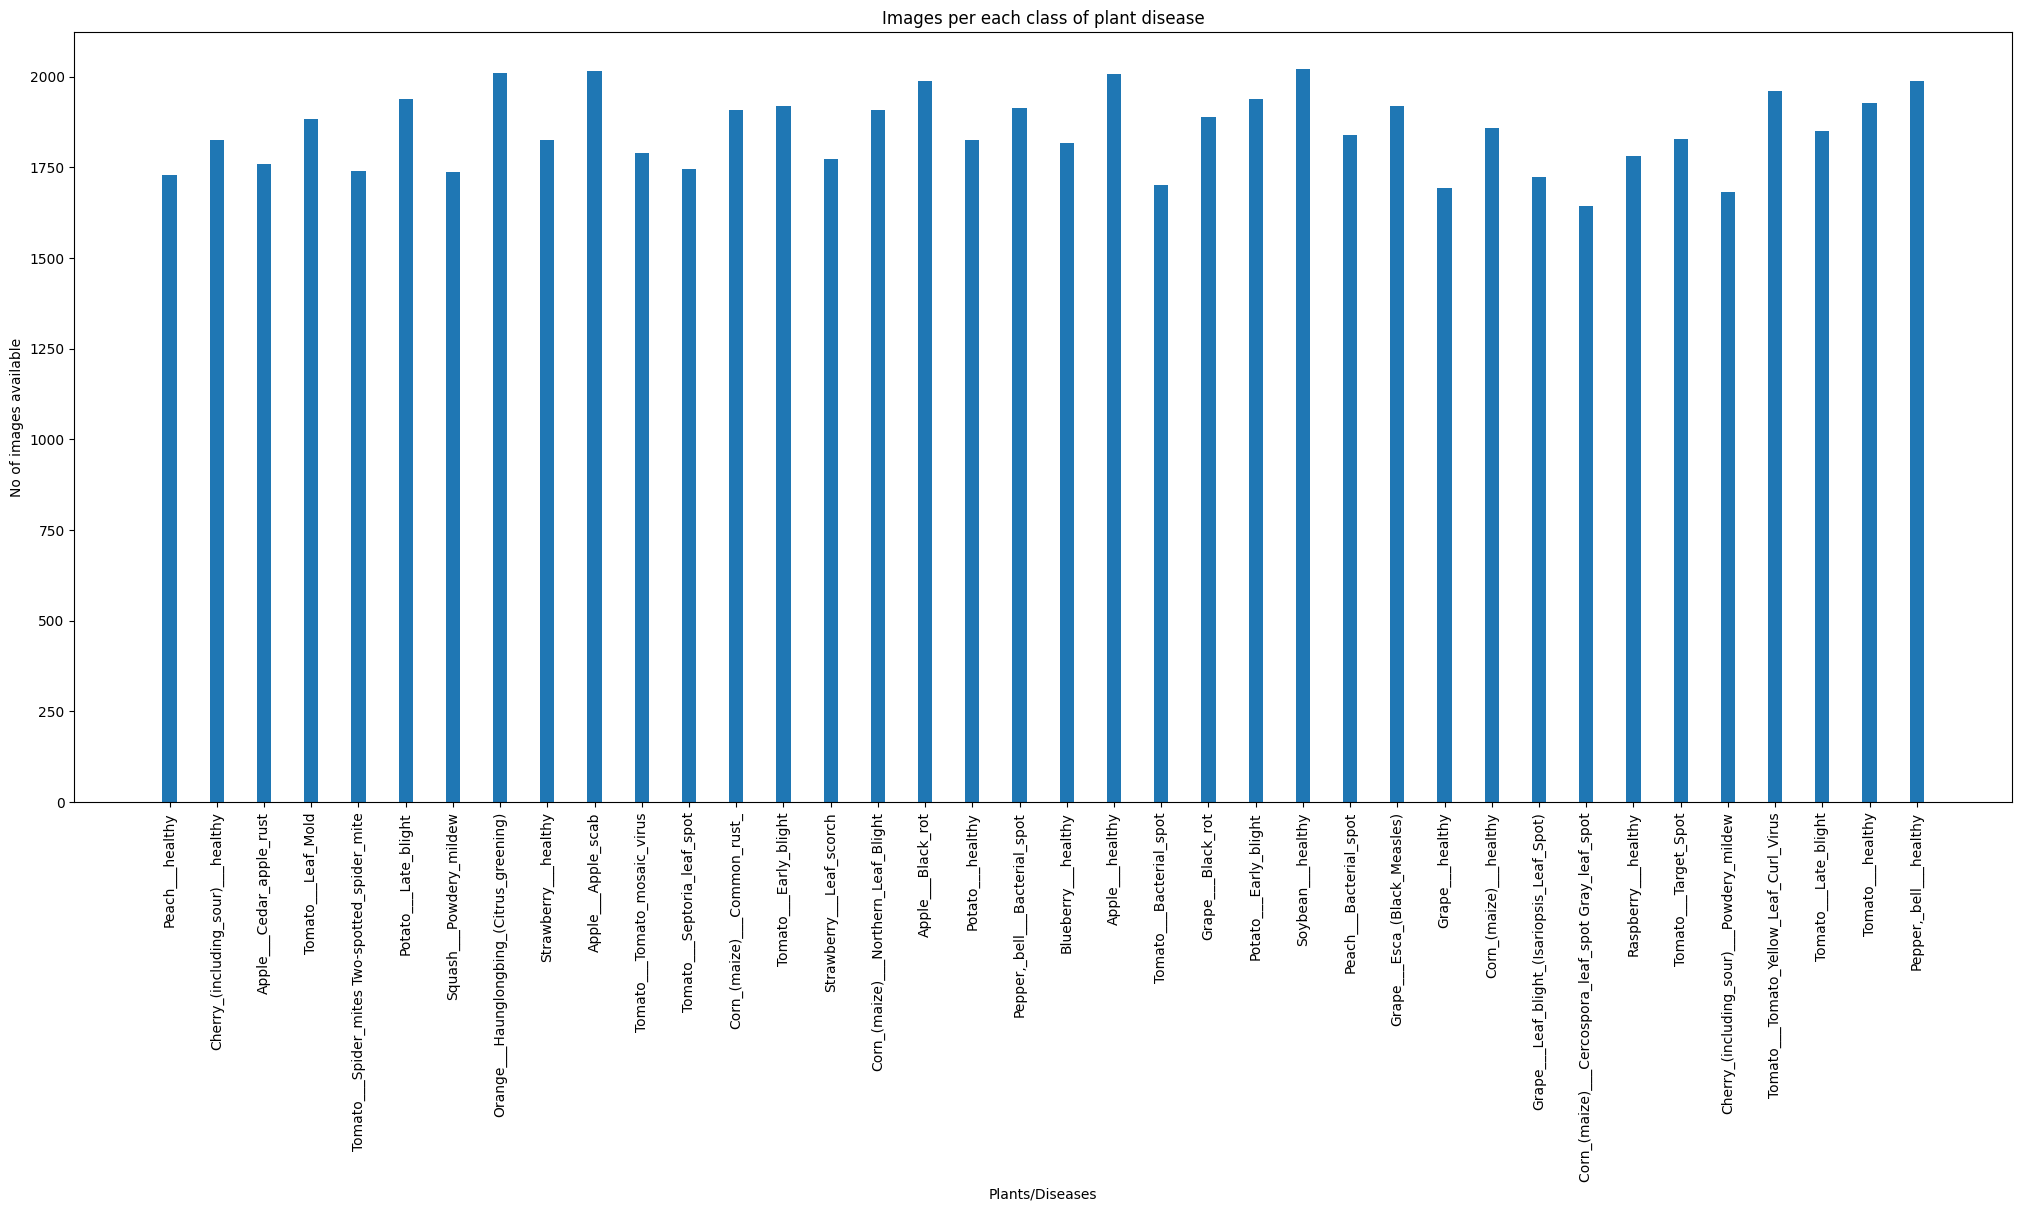

In [15]:
index = [n for n in range(38)]
plt.figure(figsize=(25, 10))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=10, rotation=90)
plt.title('Images per each class of plant disease')

In [16]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
train_gen = tf.keras.preprocessing.image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         batch_size=64, image_size=(256, 256))
test_gen = tf.keras.preprocessing.image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        batch_size=64, image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)

train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [17]:
from tensorflow.keras.optimizers import Adam

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                   

In [18]:
ep = 10
history = model.fit_generator(train_gen,validation_data=test_gen,epochs = ep)

Epoch 1/10
1099/1099 [==============================] - 377s 325ms/step - loss: 1.7697 - accuracy: 0.4846 - val_loss: 0.6030 - val_accuracy: 0.8055
Epoch 2/10
1099/1099 [==============================] - 361s 327ms/step - loss: 0.5456 - accuracy: 0.8267 - val_loss: 0.3332 - val_accuracy: 0.8903
Epoch 3/10
1099/1099 [==============================] - 358s 326ms/step - loss: 0.3325 - accuracy: 0.8921 - val_loss: 0.2143 - val_accuracy: 0.9283
Epoch 4/10
1099/1099 [==============================] - 341s 310ms/step - loss: 0.2313 - accuracy: 0.9232 - val_loss: 0.2927 - val_accuracy: 0.9015
Epoch 5/10
1099/1099 [==============================] - 358s 325ms/step - loss: 0.1744 - accuracy: 0.9420 - val_loss: 0.2590 - val_accuracy: 0.9173
Epoch 6/10
1099/1099 [==============================] - 357s 324ms/step - loss: 0.1459 - accuracy: 0.9513 - val_loss: 0.1551 - val_accuracy: 0.9492
Epoch 7/10
1099/1099 [==============================] - 359s 326ms/step - loss: 0.1122 - accuracy: 0.9620 - val_

*********************************************************************


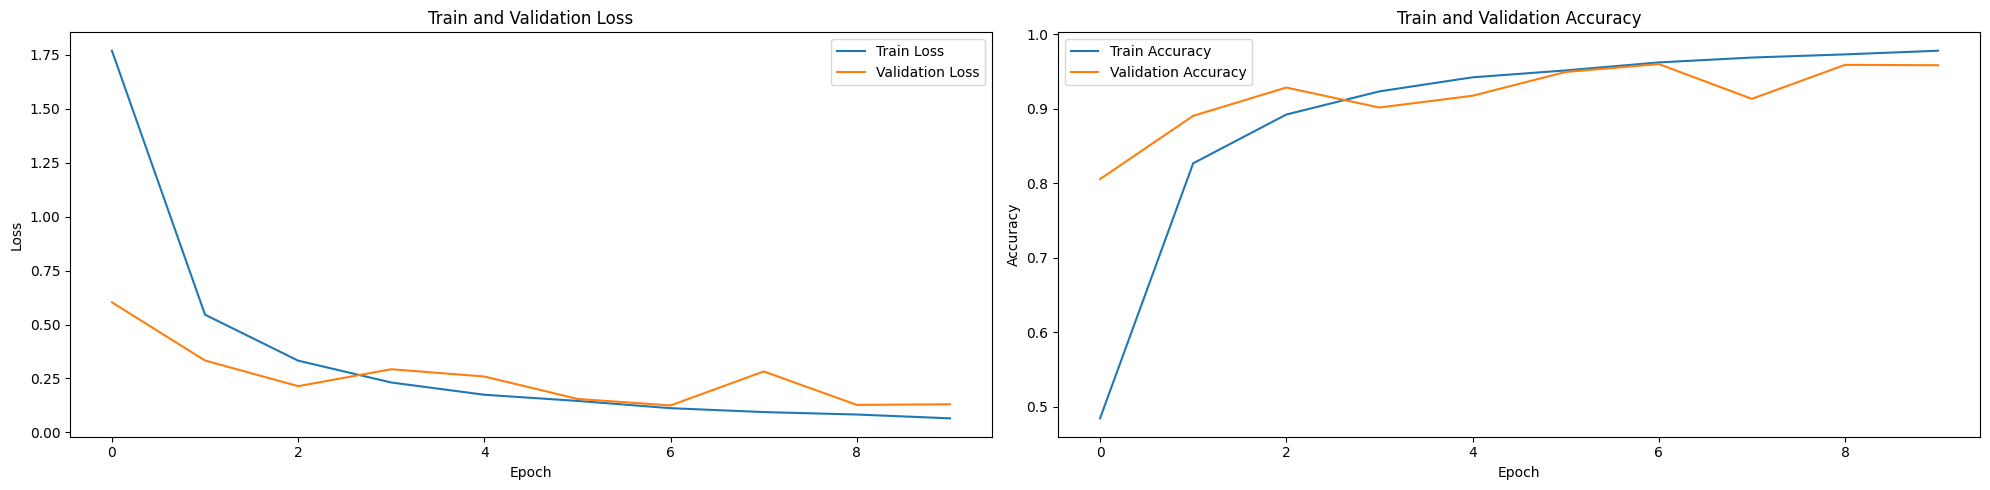

In [19]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
print("*********************************************************************")
plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.tight_layout()

In [20]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

2/2 [==============================] - 1s 430ms/step


In [21]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [22]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 97.77 %
Test Accuracy   : 95.82 %
Precision Score : 95.82 %
Recall Score    : 95.82 %


<Figure size 2000x500 with 0 Axes>

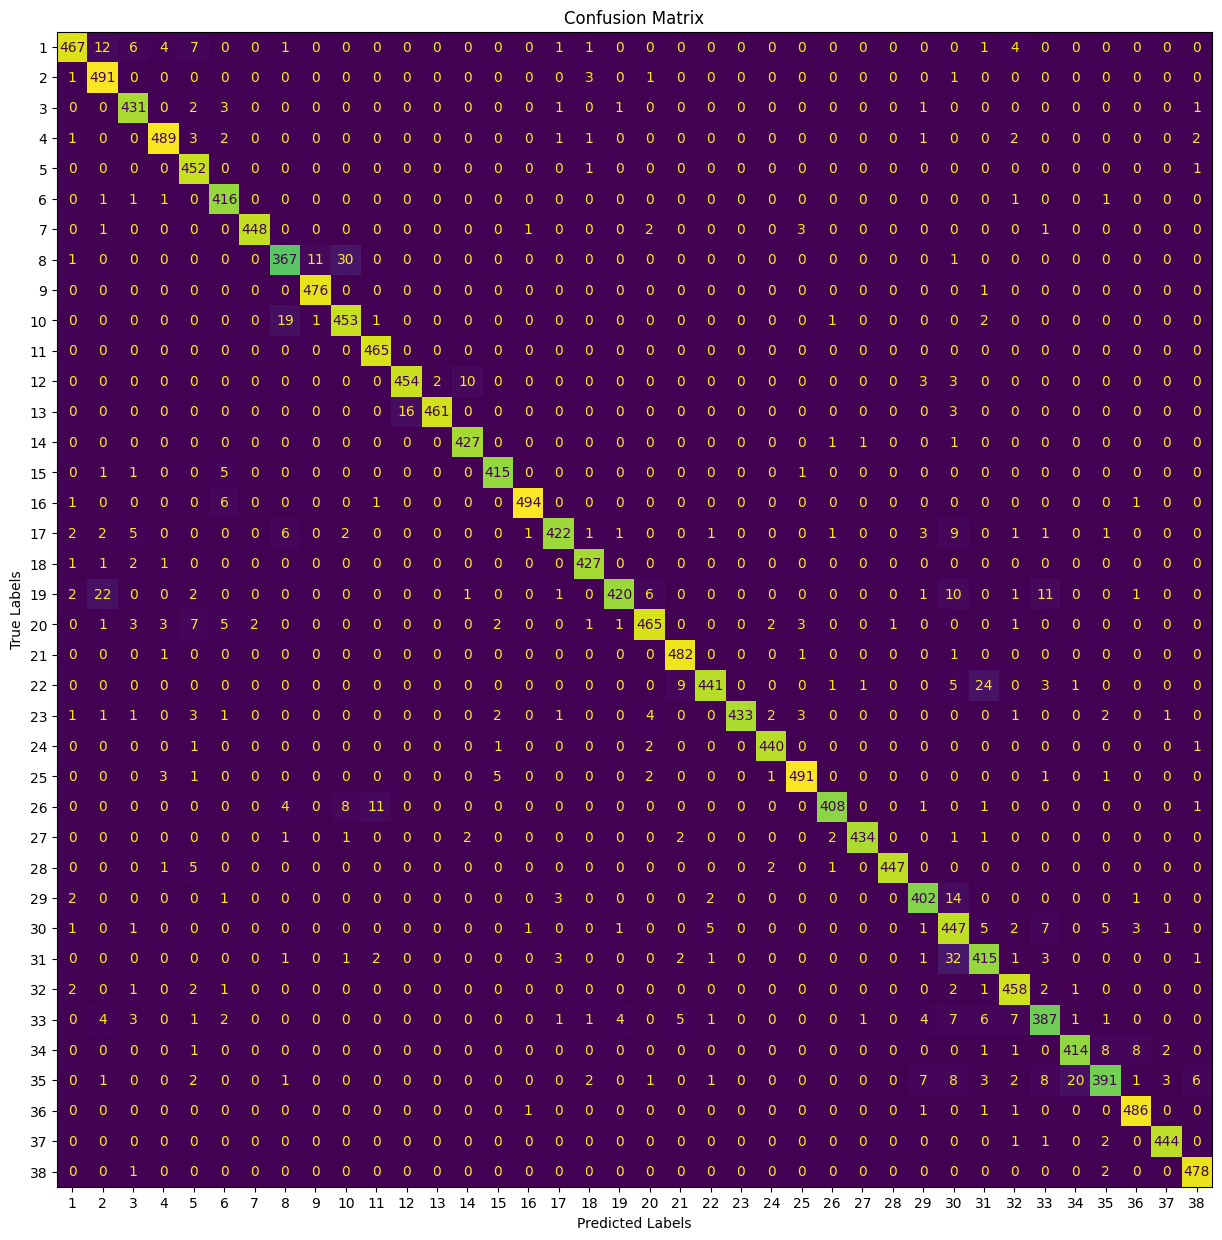

In [23]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/plantclassify.h5')
print('saved')

saved


In [24]:
model.save('plantclassify.h5')
print('saved')

saved


In [18]:
class_names = sorted(os.listdir(train_dir))
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('/content/drive/MyDrive/Colab Notebooks/models/plantclassify.h5')

def test_model(model, image_path, class_names):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_idx]

    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class_name}')
    plt.show()

    return predicted_class_name

1/1 [==============================] - 8s 8s/step


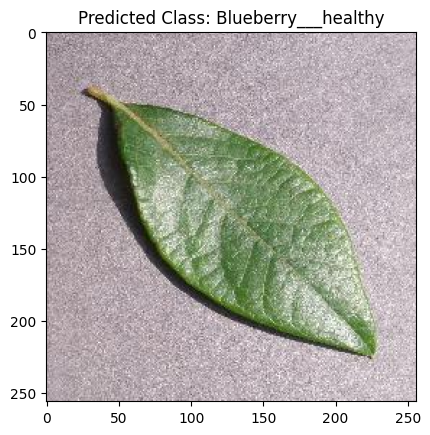

In [19]:
image_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy/00fee259-67b7-4dd7-8b36-12503bbdba14___RS_HL 2681_180deg.JPG'
predicted_class = test_model(model, image_path, class_names)

1/1 [==============================] - 0s 30ms/step


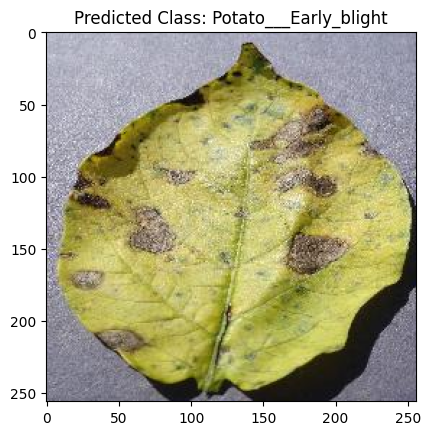

In [20]:
image_path = 'test/test/PotatoEarlyBlight4.JPG'
predicted_class = test_model(model, image_path, class_names)

1/1 [==============================] - 0s 30ms/step


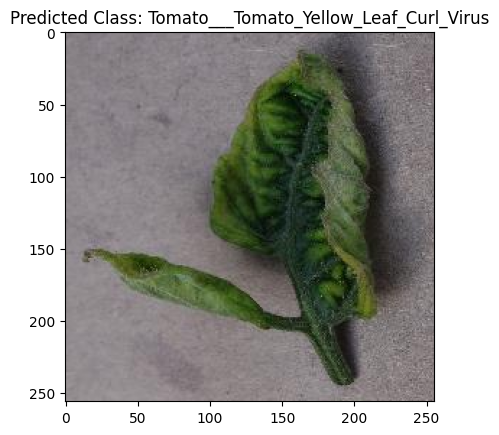

In [21]:
image_path = 'test/test/TomatoYellowCurlVirus3.JPG'
predicted_class = test_model(model, image_path, class_names)

1/1 [==============================] - 0s 30ms/step


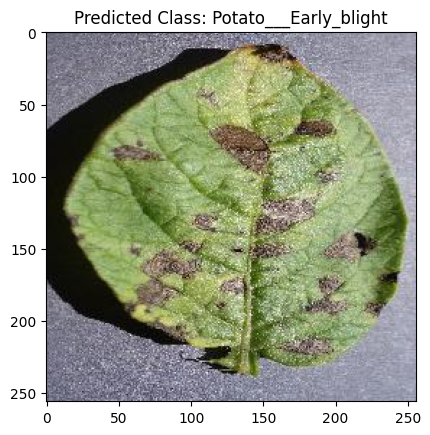

In [22]:
image_path = 'test/test/PotatoEarlyBlight2.JPG'
predicted_class = test_model(model, image_path, class_names)

1/1 [==============================] - 0s 76ms/step


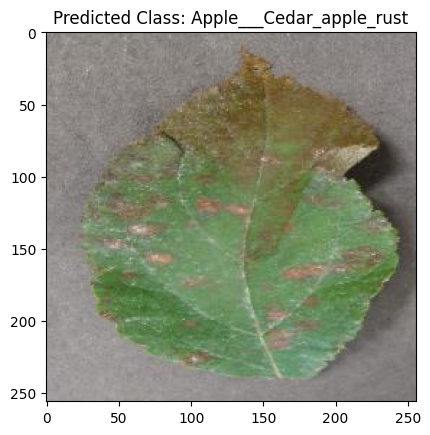

In [25]:
image_path = '/content/test/test/AppleCedarRust4.JPG'
predicted_class = test_model(model, image_path, class_names)

1/1 [==============================] - 0s 19ms/step


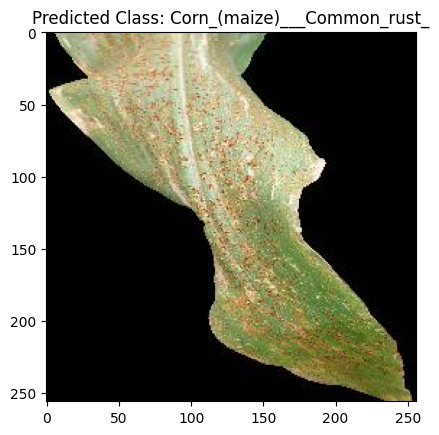

In [26]:
image_path = '/content/test/test/CornCommonRust3.JPG'
predicted_class = test_model(model, image_path, class_names)